In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator, array_to_img
from sklearn.model_selection import train_test_split
# from PIL import Image

In [2]:
# load image folder
train_data = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/cityscapes_data/train/'
valid_data = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/cityscapes_data/val/'

# create directories
train_folder = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/train/'
valid_folder = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/val/'
test_folder = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/test/'

train_folder2 = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/train2/'
valid_folder2 = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/val2/'
test_folder2 = 'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/test2/'
imgs = "imgs/img/"
masks = "masks/img/"

train_imgs_dir = os.path.join(train_folder2, imgs)
train_masks_dir = os.path.join(train_folder2, masks)
valid_imgs_dir = os.path.join(valid_folder2, imgs)
valid_masks_dir = os.path.join(valid_folder2, masks)
test_imgs_dir = os.path.join(test_folder2, imgs)
test_masks_dir = os.path.join(test_folder2, masks)


os.makedirs(train_imgs_dir)
os.makedirs(train_masks_dir)
os.makedirs(valid_imgs_dir)
os.makedirs(valid_masks_dir)

os.makedirs(test_folder)
os.makedirs(test_imgs_dir)
os.makedirs(test_masks_dir)

In [3]:
# Copy dataset into writable folder
shutil.copytree(train_data, train_folder, copy_function = shutil.copy)
shutil.copytree(valid_data, valid_folder, copy_function = shutil.copy)

'C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/val/'

In [4]:
# Total images in the dataset
print("total image in training folder: ", len(os.listdir(train_folder)))
print("total image in validation folder: ", len(os.listdir(valid_folder)))

total image in training folder:  2975
total image in validation folder:  500


In [5]:
# Spilt validation folder into validation data and test data by random sampling
source1 = valid_folder
dest11 = test_folder

files = os.listdir(source1)
random_files = random.sample(files, 50)

for f in random_files:
  shutil.move(source1 + f, dest11 + f)

In [6]:
# Total number of validation and test dataset after spilting
print("total image in validation folder: ", len(os.listdir(valid_folder)))
print("total image in test folder: ", len(os.listdir(test_folder)))

total image in validation folder:  450
total image in test folder:  50


In [7]:
# reference: https://www.kaggle.com/santhalnr/cityscapes-image-segmentation-pspnet/

# preprocess image into training and validation image
'''
The dataset is a pair of real scene images and ground truth of its semantic segmentation
get_images_masks() is used to separate the pair of images into images and masked images (segmented image) 
'''
def get_images_masks(path, path2):
    '''parameter from:path to:path2'''
    names=os.listdir(path)
    # img_g,img_m=[],[]
    for name in names:
        img=cv2.imread(path+name)
        # img=cv2.normalize(img,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=img[:,:,::-1]
        # img_g.append(img[:,:256])
        img_g = img[:,:256]
        # img_m.append(np.reshape(img[:,256:], (256,256,3)))
        img_m = np.reshape(img[:,256:], (256,256,3))


        # save to folder
        cv2.imwrite(os.path.join(path2, imgs, name), img_g)
        cv2.imwrite(os.path.join(path2, masks, name), img_m)

        # del img
    # del names
    # return img_g,img_m
        
# train_imgs,train_masks=get_images_masks(train_folder)
# valid_imgs,valid_masks=get_images_masks(valid_folder)
# valid_imgs, test_imgs, valid_masks, test_masks = train_test_split(valid_imgs, valid_masks, test_size=0.20, random_state=42)

get_images_masks(train_folder, train_folder2)
get_images_masks(valid_folder, valid_folder2)
get_images_masks(test_folder, test_folder2)

In [8]:
# !python -m pip install cityscapesscripts

In [9]:
from cityscapesscripts.helpers import labels as helper_labels

labels = helper_labels.labels

In [10]:
# Print all the labels
print("List of cityscapes labels:")
print("")
print("    {:>21} | {:>3} | {:>7} | {:>14} | {:>10} | {:>12} | {:>12} | {:>1}"
      .format( 'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color' ))
print("    " + ('-' * 110))
for label in labels:
    print("    {:>21} | {:>3} | {:>7} | {:>14} | {:>10} | {:>12} | {:>12} | {}".format( label.name, label.id, label.trainId, label.category, label.categoryId, label.hasInstances, label.ignoreInEval, label.color))
print("")

List of cityscapes labels:

                     name |  id | trainId |       category | categoryId | hasInstances | ignoreInEval | color
    --------------------------------------------------------------------------------------------------------------
                unlabeled |   0 |     255 |           void |          0 |            0 |            1 | (0, 0, 0)
              ego vehicle |   1 |     255 |           void |          0 |            0 |            1 | (0, 0, 0)
     rectification border |   2 |     255 |           void |          0 |            0 |            1 | (0, 0, 0)
               out of roi |   3 |     255 |           void |          0 |            0 |            1 | (0, 0, 0)
                   static |   4 |     255 |           void |          0 |            0 |            1 | (0, 0, 0)
                  dynamic |   5 |     255 |           void |          0 |            0 |            1 | (111, 74, 0)
                   ground |   6 |     255 |           void |

In [11]:
# labeled color from the table above
# variable type = list

color_palette = [label.color for label in labels]

for i in color_palette:
  print(i)
print("no of labels: ", len(color_palette))

(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(111, 74, 0)
(81, 0, 81)
(128, 64, 128)
(244, 35, 232)
(250, 170, 160)
(230, 150, 140)
(70, 70, 70)
(102, 102, 156)
(190, 153, 153)
(180, 165, 180)
(150, 100, 100)
(150, 120, 90)
(153, 153, 153)
(153, 153, 153)
(250, 170, 30)
(220, 220, 0)
(107, 142, 35)
(152, 251, 152)
(70, 130, 180)
(220, 20, 60)
(255, 0, 0)
(0, 0, 142)
(0, 0, 70)
(0, 60, 100)
(0, 0, 90)
(0, 0, 110)
(0, 80, 100)
(0, 0, 230)
(119, 11, 32)
(0, 0, 142)
no of labels:  35


In [12]:
# convert to numpy array

color_palette_np_array = np.array(color_palette)
print(color_palette_np_array)

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [111  74   0]
 [ 81   0  81]
 [128  64 128]
 [244  35 232]
 [250 170 160]
 [230 150 140]
 [ 70  70  70]
 [102 102 156]
 [190 153 153]
 [180 165 180]
 [150 100 100]
 [150 120  90]
 [153 153 153]
 [153 153 153]
 [250 170  30]
 [220 220   0]
 [107 142  35]
 [152 251 152]
 [ 70 130 180]
 [220  20  60]
 [255   0   0]
 [  0   0 142]
 [  0   0  70]
 [  0  60 100]
 [  0   0  90]
 [  0   0 110]
 [  0  80 100]
 [  0   0 230]
 [119  11  32]
 [  0   0 142]]


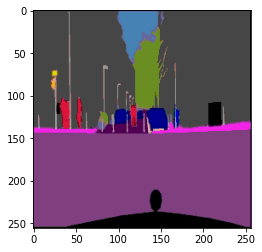

Map color to closest member of a list of colors:
Before:  [[  0   0   0]
 [  0   0   1]
 [  0   0   3]
 ...
 [255 141 255]
 [255 165 255]
 [255 171 255]]
No. of unique colors:  10385

After:  [[  0   0   0]
 [  0   0  70]
 [  0   0  90]
 [  0   0 110]
 [  0   0 142]
 [  0   0 230]
 [  0  60 100]
 [  0  80 100]
 [ 70  70  70]
 [ 70 130 180]
 [ 81   0  81]
 [102 102 156]
 [107 142  35]
 [111  74   0]
 [119  11  32]
 [128  64 128]
 [150 100 100]
 [150 120  90]
 [153 153 153]
 [180 165 180]
 [190 153 153]
 [220  20  60]
 [220 220   0]
 [230 150 140]
 [244  35 232]
 [250 170  30]
 [250 170 160]]
No. of unique colors:  27

As you can see, before have more unique colors


In [13]:
# Map color to closest member of a list of colors
# Try out before mapping all images
# ref: https://stackoverflow.com/questions/57496971/map-colors-in-image-to-closest-member-of-a-list-of-colors-in-python

from scipy.spatial import cKDTree

mask_path = "C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/train2/masks/img/10.jpg"

label = cv2.imread(mask_path)
img = label

# Input image : img
out_img = color_palette_np_array[cKDTree(color_palette_np_array).query(img,k=1)[1]]

plt.imshow(out_img)
plt.show()

# ref: https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image
print("Map color to closest member of a list of colors:")
print("Before: ", np.unique(label.reshape(-1, label.shape[2]), axis=0))
print("No. of unique colors: ", len(np.unique(label.reshape(-1, label.shape[2]), axis=0)))
print()

unique_color__ = np.unique(out_img.reshape(-1, out_img.shape[2]), axis=0)
print("After: ", unique_color__)
print("No. of unique colors: ", len(unique_color__))

print()
print("As you can see, before have more unique colors")

[[0 0 0 ... 0 0 0]
 [0 11 11 ... 11 11 0]
 [0 11 11 ... 11 11 0]
 ...
 [27 7 7 ... 7 7 6]
 [27 11 11 ... 11 11 27]
 [0 0 0 ... 0 6 0]]
Mask shape:  (256, 256)
Unique value of mask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 23 24 26 27 28 29 30
 31 32 33]
No. of unique value:  27


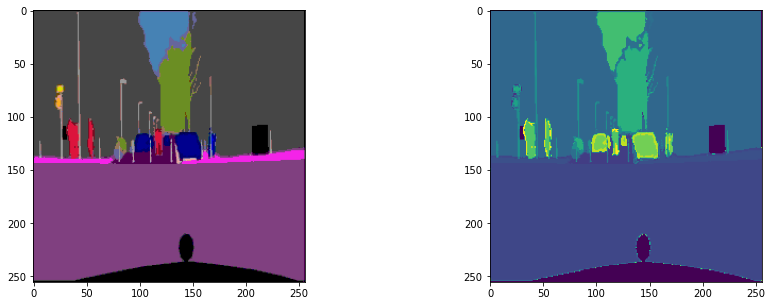

In [14]:
label = out_img

def create_one_hot_mask(label_1):
  '''Important'''

  one_hot_map = []
  for color in color_palette:
      class_map = tf.reduce_all(tf.equal(label_1, color), axis=-1)
      one_hot_map.append(class_map)

  one_hot_map = tf.stack(one_hot_map, axis=-1)
  one_hot_map = tf.cast(one_hot_map, tf.float32)

  one_hot_mask = tf.argmax(one_hot_map, axis=-1)

  # print("One hot encoded map: ", one_hot_map.shape)

  return one_hot_mask


mask = create_one_hot_mask(label)

# print("One hot encoded map: ", one_hot_map.shape)
tf.print(mask)
print("Mask shape: ", mask.shape)
print("Unique value of mask: ", np.unique(mask))
print("No. of unique value: ", len(np.unique(mask)))

# display images
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
axes[0].imshow(label)
axes[1].imshow(mask)
plt.show()


Mask shape:  (256, 256)
Unique value of mask:  [ 0  1  2  3  4  5  6  7  8  9 11 12 14 15 16 17 18 19]
No. of unique value:  18


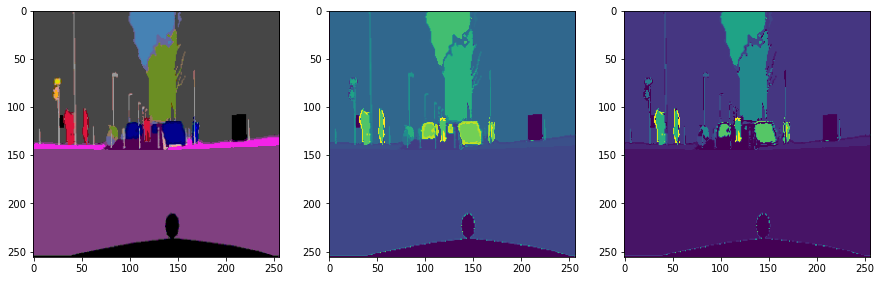

In [15]:
# reduce from 35 classes to 20 classes
# Mapping of ignore categories and valid ones (numbered from 1-19)
num_classes = 20

mapping_20_2 = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 1,
    8: 2,
    9: 0,
    10: 0,
    11: 3,
    12: 4,
    13: 5,
    14: 0,
    15: 0,
    16: 0,
    17: 6,
    18: 0,
    19: 7,
    20: 8,
    21: 9,
    22: 10,
    23: 11,
    24: 12,
    25: 13,
    26: 14,
    27: 15,
    28: 16,
    29: 0,
    30: 0,
    31: 17,
    32: 18,
    33: 19,
    -1: 0
}


def encode_labels(mask):
    label_mask = np.zeros_like(mask)
    for k in mapping_20_2:
        label_mask[mask == k] = mapping_20_2[k]
    return label_mask

mask_20 = encode_labels(mask)

print("Mask shape: ", mask_20.shape)
print("Unique value of mask: ", np.unique(mask_20))
print("No. of unique value: ", len(np.unique(mask_20)))

# display images
fig, axes = plt.subplots(1, 3,  figsize=(15, 5))
axes[0].imshow(label)
axes[1].imshow(mask)
axes[2].imshow(mask_20)
plt.show()

In [16]:
# check unique color in sample label image
set( tuple(v) for m2d in label for v in m2d )

{(0, 0, 0),
 (0, 0, 70),
 (0, 0, 90),
 (0, 0, 110),
 (0, 0, 142),
 (0, 0, 230),
 (0, 60, 100),
 (0, 80, 100),
 (70, 70, 70),
 (70, 130, 180),
 (81, 0, 81),
 (102, 102, 156),
 (107, 142, 35),
 (111, 74, 0),
 (119, 11, 32),
 (128, 64, 128),
 (150, 100, 100),
 (150, 120, 90),
 (153, 153, 153),
 (180, 165, 180),
 (190, 153, 153),
 (220, 20, 60),
 (220, 220, 0),
 (230, 150, 140),
 (244, 35, 232),
 (250, 170, 30),
 (250, 170, 160)}

In [17]:
# display the dimension of the images
ti_names = os.listdir(train_imgs_dir)
tm_names = os.listdir(train_masks_dir)
vi_names = os.listdir(valid_imgs_dir)
vm_names = os.listdir(valid_masks_dir)

# Display the number of training & validation images

print('total training images:', len(ti_names))
print('total training masked:', len(tm_names))
print('total validation images:', len(vi_names))
print('total validation masked:', len(vm_names))

# randomly spot check image size
s_i = np.random.randint(0, 100)
print(s_i)

s1 = cv2.imread(train_imgs_dir + ti_names[s_i])
# print(train_imgs_dir + ti_names[s_i])
s2 = cv2.imread(train_masks_dir + tm_names[s_i])
# print(train_imgs_dir + tm_names[s_i])
s3 = cv2.imread(valid_imgs_dir + vi_names[s_i])
# print(valid_imgs_dir + vi_names[s_i])
s4 = cv2.imread(valid_masks_dir + vm_names[s_i])
# print(valid_masks_dir + vm_names[s_i])

print("train image shape: ", s1.shape)
print("train mask shape: ", s2.shape)
print("validation image shape: ", s3.shape)
print("validation mask shape: ", s4.shape)

total training images: 2975
total training masked: 2975
total validation images: 450
total validation masked: 450
41
train image shape:  (256, 256, 3)
train mask shape:  (256, 256, 3)
validation image shape:  (256, 256, 3)
validation mask shape:  (256, 256, 3)


In [18]:
# create directory to store labelled mask images
label_mask = "label_mask/img/"

train_label_masks_dir = os.path.join(train_folder2, label_mask)
valid_label_masks_dir = os.path.join(valid_folder2, label_mask)
test_label_masks_dir = os.path.join(test_folder2, label_mask)

os.makedirs(train_label_masks_dir)
os.makedirs(valid_label_masks_dir)
os.makedirs(test_label_masks_dir)

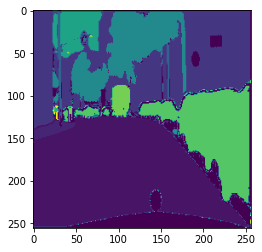

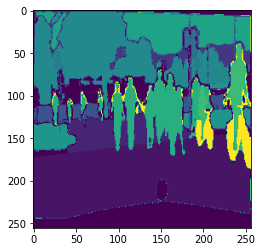

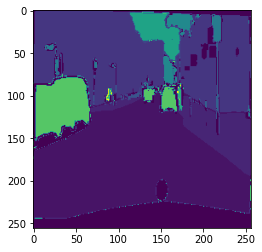

In [19]:
# Generate labelled mask

def get_label_mask(path, path2):
  names = os.listdir(path)

  for name in names:
    img = cv2.imread(path + name)


    '''Important !'''
    # Step 1: Map color to closest member of a list of color
    # Input image : img
    img = color_palette_np_array[cKDTree(color_palette_np_array).query(img,k=1)[1]]

    # Step 2: One hot encode all the 35 classes
    img_2 = create_one_hot_mask(img)

    # Step 3: Reduce 35 classes to 19 classes
    label_class = encode_labels(img_2)

    
    # Step 4: save as tiff for lossless compression
    fname = os.path.splitext(name)
    new_fname = fname[0] + ".tif"

    cv2.imwrite(os.path.join(path2, label_mask, new_fname), label_class)


  # show a sample
  plt.imshow(label_class)
  plt.show()

get_label_mask(train_masks_dir, train_folder2)
get_label_mask(valid_masks_dir, valid_folder2)
get_label_mask(test_masks_dir, test_folder2)

1467


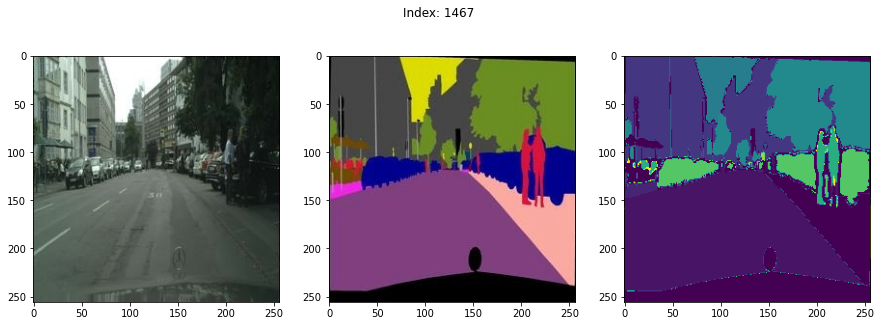

623


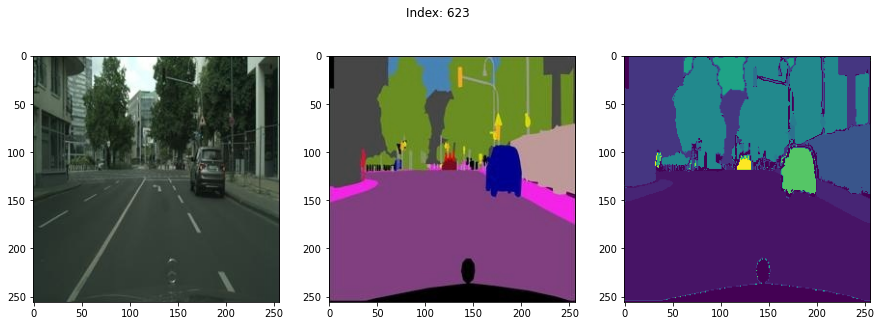

2216


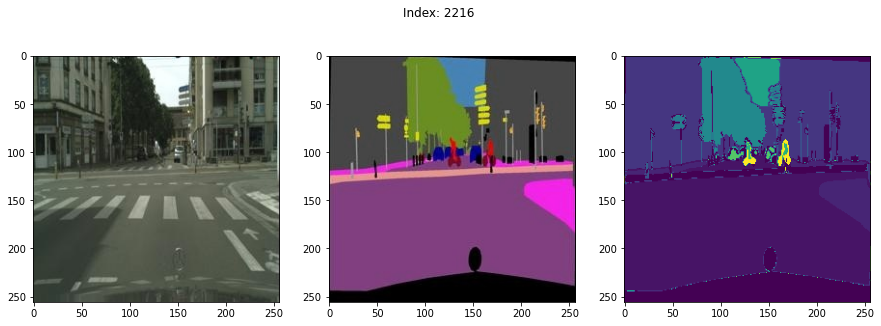

2508


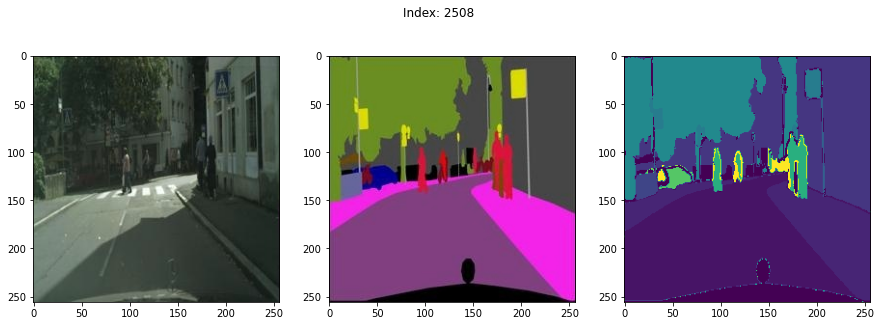

991


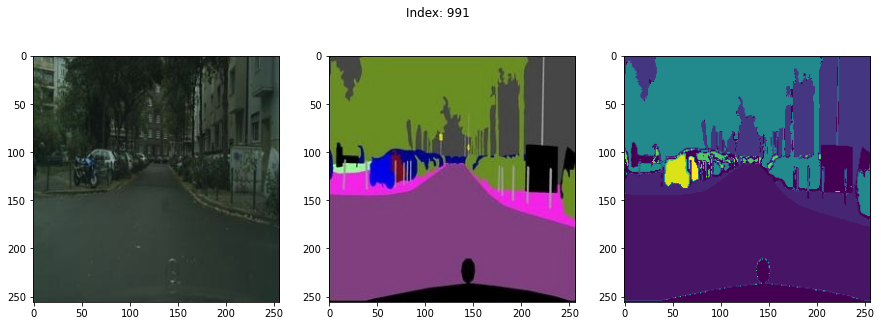

238


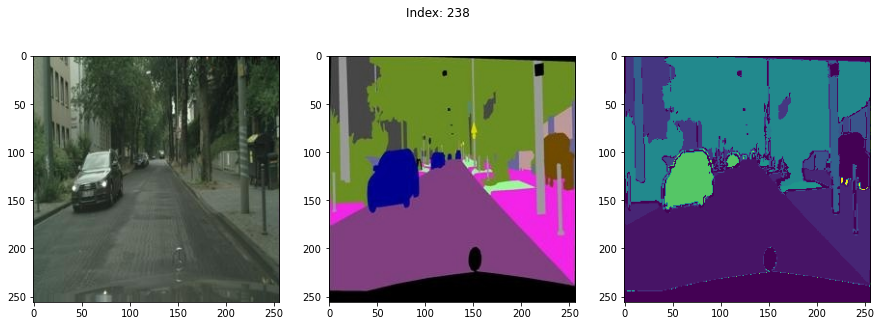

1807


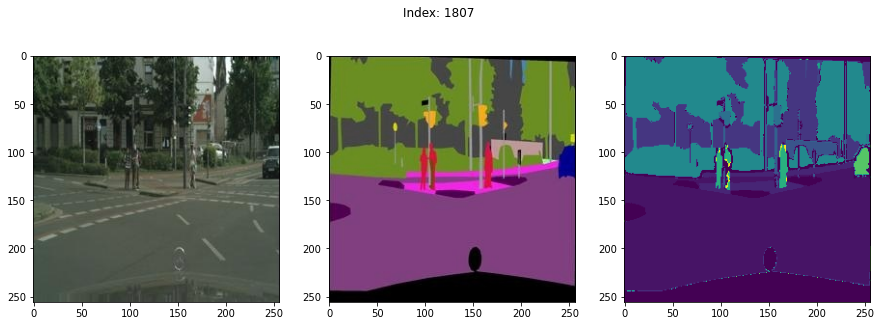

1715


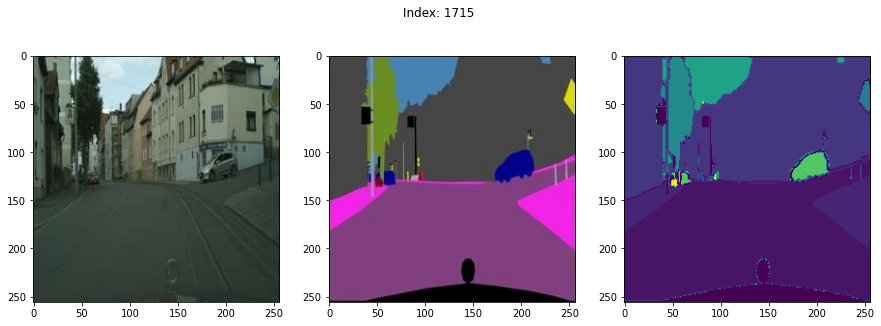

507


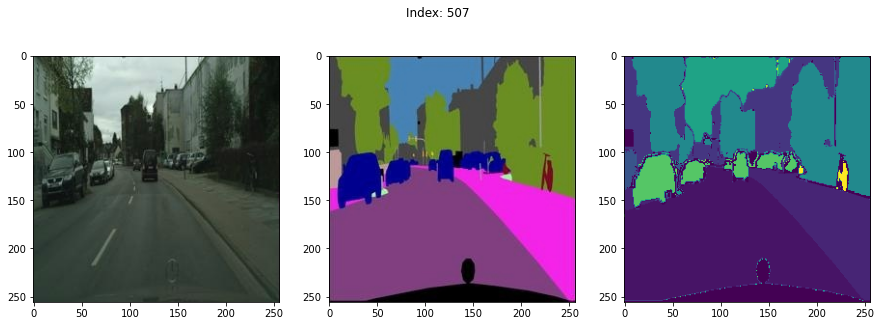

2802


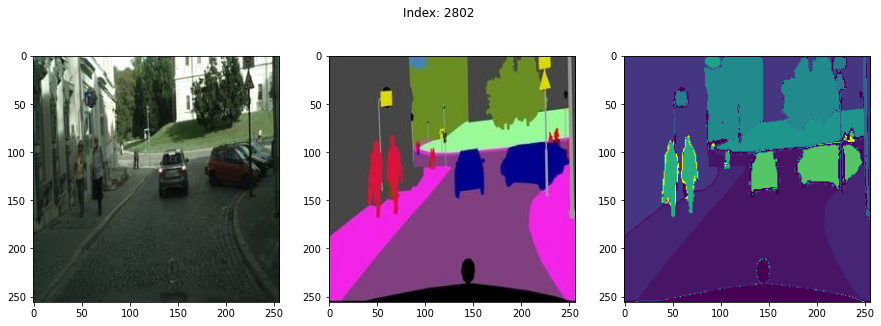

(1, 256, 256, 3)
(1, 256, 256, 1)


In [20]:
tlm_names = os.listdir(train_label_masks_dir)

# sort according to file name
ti_names = sorted(ti_names, key=lambda x: int(os.path.splitext(x)[0]))
tm_names = sorted(tm_names, key=lambda x: int(os.path.splitext(x)[0]))
tlm_names = sorted(tlm_names, key=lambda x: int(os.path.splitext(x)[0]))

# favda = cv2.imread(train_label_masks_dir+tlm_names[0])

for i in range(10):
  s_i = np.random.randint(0, len(tlm_names))
  print(s_i)

  s1 = cv2.imread(train_imgs_dir + ti_names[s_i])  # train images # s_i instead of i
  # print(train_imgs_dir + ti_names[s_i])
  s2 = cv2.imread(train_masks_dir + tm_names[s_i])  # train mask
  s3 = cv2.imread(train_label_masks_dir + tlm_names[s_i], cv2.IMREAD_UNCHANGED)  #, cv2.IMREAD_GRAYSCALE train labeled mask

  cityscape, label, label_class = s1, s2, s3

  # print(len(labels))

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  axes[0].imshow(cityscape)
  axes[1].imshow(label)
  axes[2].imshow(label_class)
  fig.suptitle("Index: %i" %s_i)
  plt.show()

print(cityscape[tf.newaxis, ...].shape)
print(label_class[tf.newaxis, ..., tf.newaxis].shape)

In [21]:
# identify unique value in masked image
print(s3.shape)
print(np.unique(s3))
print("No of unique values:", len(np.unique(s3)))

(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
No of unique values: 19


In [22]:
# Image Data Generator
data_gen_args = dict(
                     rotation_range=0,
                     width_shift_range=0,
                     height_shift_range=0, 
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args, rescale=1./255)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
batch_size = 8
image_datagen.fit(cityscape[tf.newaxis, ...], augment=True, seed=seed)
mask_datagen.fit(label_class[tf.newaxis, ..., tf.newaxis], augment=True, seed=seed)

# training data
image_generator = image_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/train2/imgs/", seed=seed, class_mode=None, batch_size=batch_size)
mask_generator = mask_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/train2/label_mask", seed=seed, class_mode=None, batch_size=batch_size, color_mode='grayscale')

# validation data
val_image_generator = image_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/val2/imgs/", seed=seed, class_mode=None, batch_size=batch_size)
val_mask_generator = mask_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/val2/label_mask", seed=seed, class_mode=None, batch_size=batch_size, color_mode='grayscale')

# test data
test_image_generator = image_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/test2/imgs/", seed=seed, class_mode=None, batch_size=batch_size)
test_mask_generator = mask_datagen.flow_from_directory("C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/cityscapes_data/test2/label_mask", seed=seed, class_mode=None, batch_size=batch_size, color_mode='grayscale')


# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)
valid_generator = zip(val_image_generator, val_mask_generator)
test_generator = zip(test_image_generator, test_mask_generator)

Found 2975 images belonging to 1 classes.
Found 2975 images belonging to 1 classes.
Found 450 images belonging to 1 classes.
Found 450 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


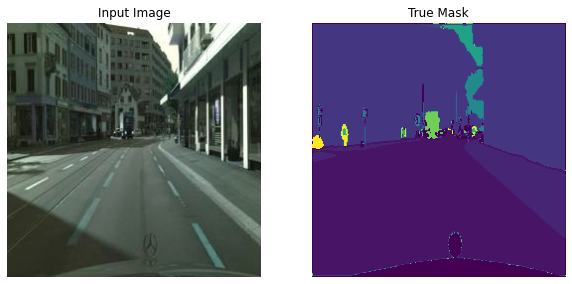

Shape:  (256, 256, 3)
Min:  0.0 Max:  0.7607844
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


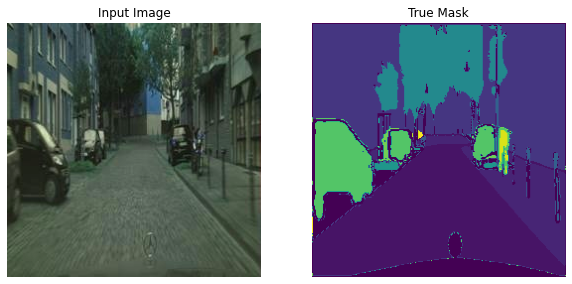

Shape:  (256, 256, 3)
Min:  0.027450982 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


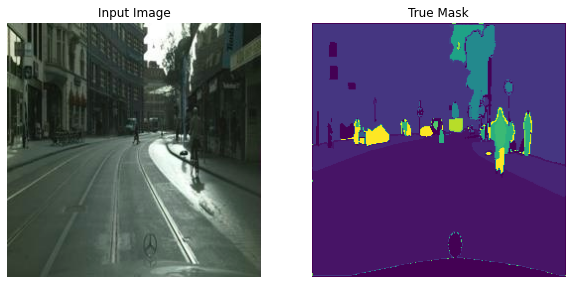

Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


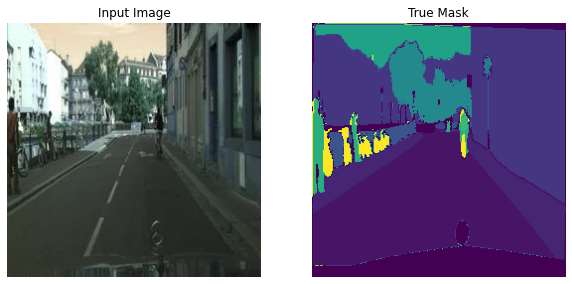

Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


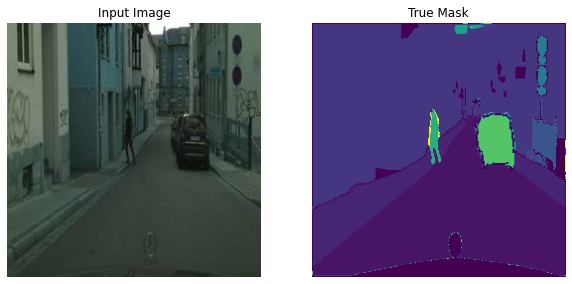

Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


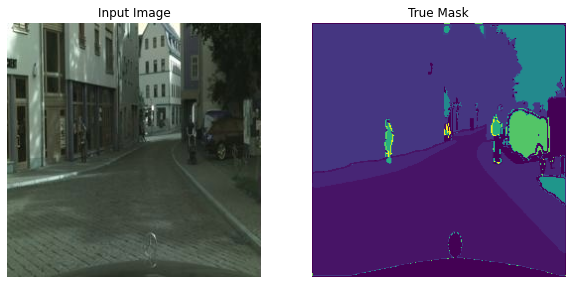

Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


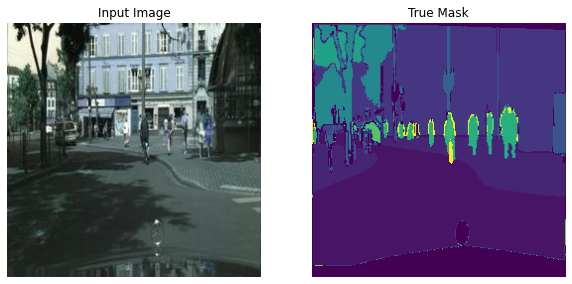

Shape:  (256, 256, 3)
Min:  0.0 Max:  1.0
Shape:  (256, 256, 1)
Min:  0.0 Max:  19.0


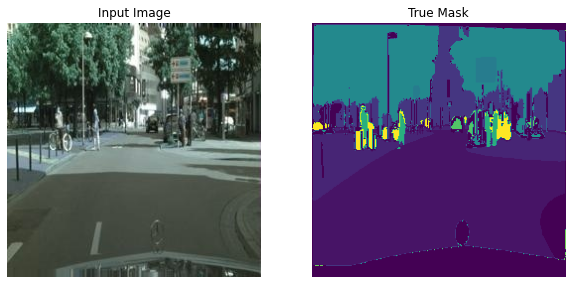

In [23]:
x, y = next(train_generator)

# https://www.tensorflow.org/tutorials/images/segmentation

display_list = [x, y]


title = ['Input Image', 'True Mask']

for r in range(len(display_list[0])):  # batch size (eg: 32)
  plt.figure(figsize=(10, 10))
  for i in range(len(display_list)):  # pair size from generator (eg: x, y), len = 2
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(array_to_img(display_list[i][r]))
    print("Shape: ", display_list[i][r].shape)
    print("Min: ", display_list[i][r].min(), "Max: ", display_list[i][r].max())
    plt.axis('off')
  plt.show()

In [24]:
from keras.layers import (SeparableConv2D, Conv2D, BatchNormalization, 
                                     Activation, MaxPool2D, AveragePooling2D, 
                                     Conv2DTranspose, Concatenate, Input, Lambda,
                                     UpSampling2D)
from keras.models import Model
import keras
import tensorflow as tf
import numpy as np

In [25]:
#@title Convolution Layer
def conv_block(input, num_filters):

    # Original
    x = Conv2D(num_filters, kernel_size=3, strides=2, padding="same")(input)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    print(x.shape)

    return x

In [26]:
#@title custom keras layer: Depth Wise Convolution Layer

class DwConv2D(tf.keras.layers.Layer):
  """
  Depth-wise Convolution Layer

  Input shape:
    4D tensor with shape:
    `[batch_size, rows, cols, channels]`
  """
  
  def __init__(self, kernel_size=3):
    
    super(DwConv2D, self).__init__()
    self.kernel_size = (kernel_size,) * 2
    self.filter = 1


  def build(self, input_shape):
    
    shape = list(self.kernel_size) + [1, self.filter]
    self.kernel = self.add_weight("kernel",
                                  shape=shape)
    
  def call(self, input):
    
    for i in range(input.shape[-1]):

      if i == 0:

        # channel slicing into (H, W) for i-th channel
        x = Lambda(lambda x: x[..., i], output_shape=(input.shape[-3], input.shape[-2], 1))(input)
        x = tf.expand_dims(x, axis=-1)  # (None, 256, 256, 1)
        x1 = tf.nn.conv2d(x, filters=self.kernel, strides=1, padding='SAME')

      else:

        # channel slicing into (H, W) for i-th channel
        x = Lambda(lambda x: x[..., i], output_shape=(input.shape[-3], input.shape[-2], 1))(input)
        x = tf.expand_dims(x, axis=-1)
        x2 = tf.nn.conv2d(x, filters=self.kernel, strides=1, padding='SAME')


        # concatenate all channel after single channel convolution
        x1 = tf.concat([x1, x2], -1)

    return x1

  def compute_output_shape(self, input_shape):
        
    return input_shape

In [27]:
#@title custom keras layer: Depth Wise Convolution Layer

class TransposeDwConv2D(tf.keras.layers.Layer):
  """
  Depth-wise Convolution Layer

  Input shape:
    4D tensor with shape:
    `[batch_size, rows, cols, channels]`
  """
  
  def __init__(self, kernel_size=3):
    
    super(TransposeDwConv2D, self).__init__()
    self.kernel_size = (kernel_size,) * 2
    self.filter = 1
    self.stride = 2
    self.stride_h = self.stride_w = self.stride


  def build(self, input_shape):
    
    shape = list(self.kernel_size) + [1, self.filter]
    self.kernel = self.add_weight("kernel",
                                  shape=shape)
    
    self.output_h = input_shape[-3] * self.stride_h
    self.output_w = input_shape[-2] * self.stride_w

    
  def call(self, input):

    self.output_s = tf.stack([tf.shape(input)[0], self.output_h, self.output_w, self.filter])


    for i in range(input.shape[-1]):

      if i == 0:

        # channel slicing into (H, W) for i-th channel
        x = Lambda(lambda x: x[..., i], output_shape=(input.shape[-3], input.shape[-2], 1))(input)
        x = tf.expand_dims(x, axis=-1)  # (None, 256, 256, 1)
        x1 = tf.nn.conv2d_transpose(x, filters=self.kernel, output_shape=self.output_s , strides=self.stride, padding='SAME')

      else:

        # channel slicing into (H, W) for i-th channel
        x = Lambda(lambda x: x[..., i], output_shape=(input.shape[-3], input.shape[-2], 1))(input)
        x = tf.expand_dims(x, axis=-1)
        x2 = tf.nn.conv2d_transpose(x, filters=self.kernel, output_shape=self.output_s, strides=self.stride, padding='SAME')

        # concatenate all channel after single channel convolution
        x1 = tf.concat([x1, x2], -1)

    return x1

  def compute_output_shape(self, input_shape):

    return tf.TensorShape(input_shape[0], self.output_h, self.output_w, input_shape[-1])

In [28]:
#@title Spark Module
def SparkModule(input, S, E1, E3):
  """
  Arguments:        
        inputs -- shape of the input images (H, W, C)
        S: Number of kernels in squeeze layer
        E1: Number of 1 x 1 kernels in expand layer
        E3: Number of 3x3 kernels in expand layer
        S < E1 + E3
  """

  # squeeze layer(S)
  x = BatchNormalization()(input)
  x = Conv2D(filters=S, kernel_size=1, padding="same")(x)
  x = Activation("relu")(x)

  # Expand Layer(E1)
  x1 = BatchNormalization()(x)
  x1 = Conv2D(filters=E1, kernel_size=1, padding="same")(x1)
  x1 = Activation("relu")(x1)


  # Expand Layer(E3)
  x2 = BatchNormalization()(x)
  x2 = DwConv2D()(x2)
  x2 = Conv2D(filters=E3, kernel_size=1, padding='same')(x2)  #pixelwise conv
  x2 = Activation("relu")(x2)

  output = Concatenate()([x1, x2])

  return output

In [29]:
#@title Encoder Block
def down_block(input, C):

  x = AveragePooling2D(pool_size=2, strides=2)(input)
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2

  return x

In [30]:
#@title Middle Block/Bridge Block
def mid_block(input, C):

  x = AveragePooling2D(pool_size=2, strides=2)(input)
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2
  x = SparkModule(x, int(C/4), int(C/2), int(C/2))  # output C = C/2 + C/2

  return x

In [31]:
#@title Decoder Block
def up_block(input, skip, C):
    
  x1 = TransposeDwConv2D()(input)
  
  x1 = Conv2D(filters=C, kernel_size=1, padding='same')(x1)  #pixelwise conv

  # concatenate previous layer
  x = Concatenate()([x1, skip])
    
  # custom layer
  x = DwConv2D()(x)  # depthwise conv
  x = Conv2D(filters=C, kernel_size=1, padding='same')(x)  #pixelwise conv

  return x

In [32]:
#@title SegFast Architecture
def build_segfast(input_shape, noc):
    
  # input layer
  inputs = Input(input_shape)

  # four encoder blocks
  # the number of filters begin with 64, subsequently double the filters
  p1 = conv_block(inputs, 64)   # H/2 x W/2 x C
  p2 = down_block(p1, 2*64)     # H/4 x W/4 x 2C
  p3 = down_block(p2, 4*64)     # H/8 x W/8 x 4C

  m1 = mid_block(p3, 8*64)      # H/16 x W/16 x 8C

  # three decoder blocks, uses previous feature map as input
  # the input is upsampled and concatenated with appropriate skip connection 
  # from encoder block, followed by depthwise separatble convolution
  d1 = up_block(m1, p3, 4*64)   # H/8 x W/8 x 4C
  d2 = up_block(d1, p2, 2*64)   # H/4 x W/4 x 2C
  d3 = up_block(d2, p1, 1*64)   # H/2 x W/2 x C


  # the output of 4th decoder block passes through a 1x1 convolutional layer
  # wih sigmoid activation function
  '''
  For binary segmentation, we use 1 output feature channel with sigmoid 
  activation. While in multiclass segmentation, we use the number of classes 
  as the output feature channel with softmax activation function.
  '''
  outputs = Conv2D(noc, 1, padding="same", activation="softmax")(d3)  # multiclass

  # upsample with bilinear interpolation
  outputs = UpSampling2D(2, interpolation='bilinear')(outputs)

  model = Model(inputs, outputs, name="SegFast")
    
  return model

In [33]:
# RUN UNet
input_shape = (256, 256, 3)

#number of class
# noc = num_classes
noc = 20
segfast_model = build_segfast(input_shape, noc)

(None, 128, 128, 64)


In [34]:
segfast_model.summary()

Model: "SegFast"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 128, 128, 64  0           ['conv2d[0][0]']                 
                                )                                                           

In [35]:
tf.keras.utils.plot_model(model=segfast_model, show_shapes=True, to_file='C:/Users/2jeet/Desktop/Sujuz/ml_projects/2. segmentation/working/Segfast Model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [36]:
# try out the model before model training

testing_shape = np.random.randn(256, 256, 3)
testing_shape = testing_shape.reshape(-1, 256, 256, 3)
Y_pred = segfast_model.predict(testing_shape)

print(Y_pred.shape)

1/1 [==============================] - 20s 20s/step
(1, 256, 256, 20)


In [37]:
import math

In [38]:
def IoULoss(targets, inputs, smooth=1e-6):

    # flatten label and prediction tensors
    targets = targets.flatten()
    inputs = inputs.flatten()    
    
    intersection = np.sum(np.dot(targets, inputs))
    total = np.sum(targets) + np.sum(inputs)
    union = total - intersection
    
    IoU = (intersection + smooth) / (union + smooth)
    return 1 - IoU

In [39]:
def soft_dice_loss(y_true, y_pred, epsilon=1e-6): 
  ''' 
  Soft dice loss calculation for arbitrary batch size, number of classes, and number of spatial dimensions.
  Assumes the `channels_last` format.

  # Arguments
      y_true: b x X x Y( x Z...) x c One hot encoding of ground truth
      y_pred: b x X x Y( x Z...) x c Network output, must sum to 1 over c channel (such as after softmax) 
      epsilon: Used for numerical stability to avoid divide by zero errors
  
  # References
      V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation 
      https://arxiv.org/abs/1606.04797
      More details on Dice loss formulation 
      https://mediatum.ub.tum.de/doc/1395260/1395260.pdf (page 72)
      
      Adapted from https://github.com/Lasagne/Recipes/issues/99#issuecomment-347775022
  '''

  # print("(0)", y_true.shape)  # (8, 256, 256, 1)
  # print("(1)", y_pred.shape)  # (8, 256, 256, 20)

  # skip the batch and class axis for calculating Dice score
  y_true = tf.keras.utils.to_categorical(y_true[..., -1], 20)
  
  axes = tuple(range(1, len(y_pred.shape)-1)) 
  numerator = 2. * np.sum(y_pred * y_true, axes)
  denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)
  
  return 1 - np.mean((numerator + epsilon) / (denominator + epsilon)) # average over classes and batch
  # thanks @mfernezir for catching a bug in an earlier version of this implementation!

def soft_dice_loss_keras(y_true, y_pred):
  loss_output = tf.py_function(soft_dice_loss, [y_true, y_pred], tf.float64)
  return loss_output

def soft_dice_metric(y_true, y_pred):
  loss_output = tf.py_function(soft_dice_loss, [y_true, y_pred], tf.float64)
  return 1-loss_output

In [40]:
#@title Compile Models

segfast_model.compile(
              optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=[soft_dice_metric]
              )

In [41]:
def create_mask(pred_mask):
  # tf.argmax produce array shape of (H x W)
  pred_mask = tf.argmax(pred_mask, axis=-1)
  # adds an axis for grayscale image (H x W x 1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

1/1 [==============================] - 21s 21s/step
Shape:  Input Image (256, 256, 3)
Sample Value: [[0.30980393 0.30980393 0.30980393 ... 0.24705884 0.2509804  0.2509804 ]
 [0.30588236 0.30588236 0.30588236 ... 0.24313727 0.24313727 0.24313727]
 [0.3019608  0.3019608  0.3019608  ... 0.2392157  0.2392157  0.2392157 ]
 ...
 [0.12156864 0.12156864 0.12156864 ... 0.18823531 0.20000002 0.20000002]
 [0.11764707 0.11764707 0.11764707 ... 0.22352943 0.21568629 0.20784315]
 [0.11764707 0.11764707 0.11764707 ... 0.29411766 0.27058825 0.2509804 ]]
Shape:  True Mask (256, 256, 1)
Sample Value: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  3. ...  3.  3.  0.]
 [ 0.  3.  3. ...  3.  3.  0.]
 ...
 [15.  1.  1. ...  1.  1.  0.]
 [15.  3.  3. ...  3.  3. 15.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Shape:  Predicted Mask (256, 256, 1)
Sample Value: tf.Tensor(
[[11  9  9 ... 18  9  9]
 [11 11  9 ... 18 14 14]
 [11 11 11 ... 11  2  2]
 ...
 [ 6  6  6 ...  6  6  2]
 [ 2  2  2 ...  6  6  6]
 [ 2  2  2 ...  6  6  6]],

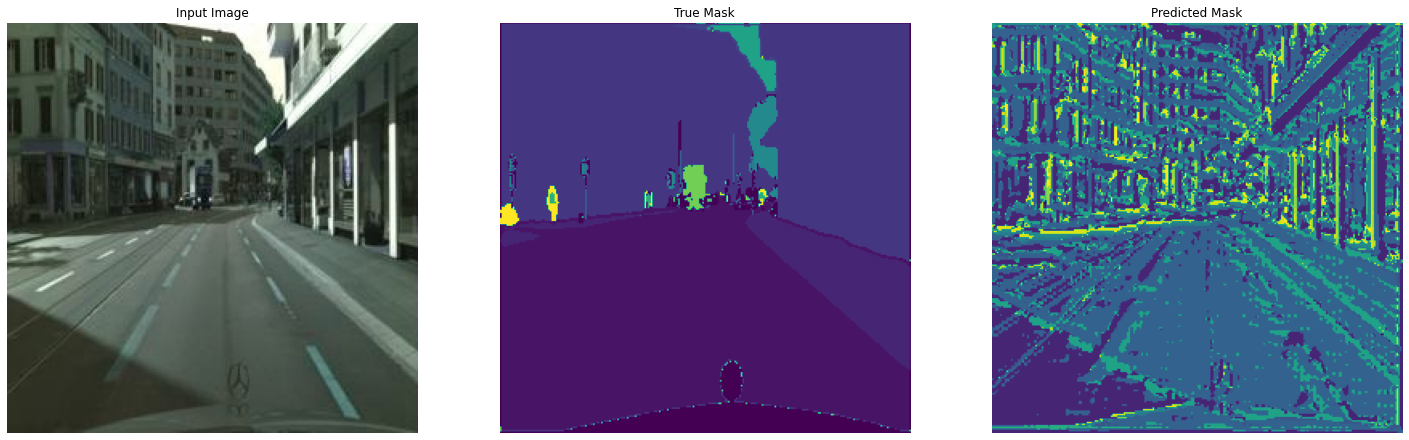

Unique value of Predicted Mask [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [42]:
# Segfast Model

title = ['Input Image', 'True Mask', 'Predicted Mask']

display_list = [x[0], y[0], create_mask(segfast_model.predict(x[0][tf.newaxis, ...]))]


plt.figure(figsize=(25, 25))
for i in range(len(title)):  # pair size from generator (eg: x, y), len = 2
    plt.subplot(1, len(title), i+1)
    plt.title(title[i])
    plt.imshow(array_to_img(display_list[i]))
    print("Shape: ", title[i], display_list[i].shape)
    print("Sample Value:", display_list[i][..., -1])
    plt.axis('off')
plt.show()
print("Unique value of Predicted Mask", np.unique(display_list[2]))

In [43]:
#@title fit Segfast Model

EPOCHS = 20

segfast_history = segfast_model.fit(train_generator, 
                 steps_per_epoch = math.ceil(image_generator.samples // batch_size),
                 validation_data = valid_generator, 
                 validation_steps = math.ceil(val_image_generator.samples // batch_size), 
                 epochs = EPOCHS, verbose = 1)

Epoch 1/20
371/371 [==============================] - 6238s 16s/step - loss: 1.5139 - soft_dice_metric: 0.1697 - val_loss: 2.1875 - val_soft_dice_metric: 0.0868
Epoch 2/20
371/371 [==============================] - 5160s 14s/step - loss: 0.8935 - soft_dice_metric: 0.2528 - val_loss: 1.4366 - val_soft_dice_metric: 0.1997
Epoch 3/20
371/371 [==============================] - 5440s 15s/step - loss: 0.7745 - soft_dice_metric: 0.2729 - val_loss: 0.8548 - val_soft_dice_metric: 0.2659
Epoch 4/20
371/371 [==============================] - 5255s 14s/step - loss: 0.7271 - soft_dice_metric: 0.2835 - val_loss: 0.7879 - val_soft_dice_metric: 0.2708
Epoch 5/20
371/371 [==============================] - 5240s 14s/step - loss: 0.6917 - soft_dice_metric: 0.2903 - val_loss: 1.7483 - val_soft_dice_metric: 0.2104
Epoch 6/20
371/371 [==============================] - 5191s 14s/step - loss: 0.6659 - soft_dice_metric: 0.2958 - val_loss: 0.7572 - val_soft_dice_metric: 0.2698
Epoch 7/20
371/371 [==============

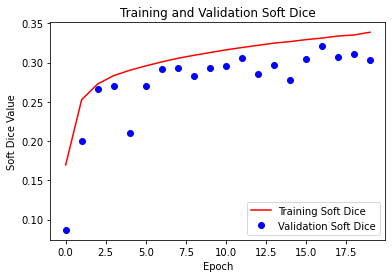

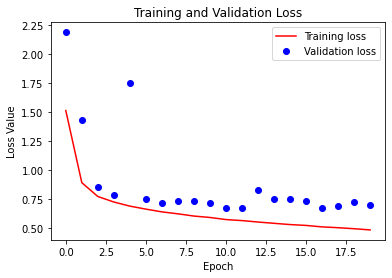

In [44]:
# SegFast

softdice = segfast_history.history['soft_dice_metric']
val_softdice = segfast_history.history['val_soft_dice_metric']

loss = segfast_history.history['loss']
val_loss = segfast_history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, softdice, 'r', label='Training Soft Dice')
plt.plot(epochs, val_softdice, 'bo', label='Validation Soft Dice')
plt.title('Training and Validation Soft Dice')
plt.xlabel('Epoch')
plt.ylabel('Soft Dice Value')
# plt.ylim([0, 1])
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()

In [45]:
# SegFast

print("loss:\t\t", segfast_history.history['loss'][-1])
print("IOU:\t\t", segfast_history.history['soft_dice_metric'][-1])
print("val_loss:\t", segfast_history.history['val_loss'][-1])
print("val_IOU:\t", segfast_history.history['val_soft_dice_metric'][-1])

loss:		 0.48705950379371643
IOU:		 0.3387719690799713
val_loss:	 0.7006328701972961
val_IOU:	 0.30352506041526794


In [46]:
X, Y = next(test_generator)


Y_pred_ = segfast_model.predict(tf.zeros([1, 256, 256, 3]))
print(Y_pred_.shape)

Y_pred = create_mask(Y_pred_)
print(Y_pred.shape)

1/1 [==============================] - 0s 369ms/step
(1, 256, 256, 20)
(256, 256, 1)


In [47]:
print(Y_pred_[0][:,:,0])
print()
print(Y_pred[:,:,0])
print(np.unique(Y_pred))

[[0.808369   0.80947816 0.8116966  ... 0.76898015 0.7877275  0.79710114]
 [0.816149   0.7990073  0.7647241  ... 0.71908    0.75271446 0.76953167]
 [0.83170897 0.7780657  0.67077905 ... 0.61927974 0.68268836 0.71439266]
 ...
 [0.6989617  0.68070936 0.64420474 ... 0.32038003 0.42732742 0.4808011 ]
 [0.70247275 0.69867456 0.6910782  ... 0.4832257  0.5508597  0.58467674]
 [0.7042283  0.7076572  0.714515   ... 0.56464857 0.61262584 0.6366145 ]]

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 3 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(256, 256), dtype=int64)
[0 1 3]


In [48]:
print(Y_pred)

tf.Tensor(
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [3]
  [3]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], shape=(256, 256, 1), dtype=int64)


In [49]:
'''
Test Images Directory
1. test_imgs_dir
2. test_masks_dir
3. test_label_masks_dir
'''

test_img_names = os.listdir(test_imgs_dir)
test_mask_names = os.listdir(test_masks_dir)
test_labelled_mask_names = os.listdir(test_label_masks_dir)

# sort according to file name
test_img_names = sorted(test_img_names, key=lambda x: int(os.path.splitext(x)[0]))
test_mask_names = sorted(test_mask_names, key=lambda x: int(os.path.splitext(x)[0]))
test_labelled_mask_names = sorted(test_labelled_mask_names, key=lambda x: int(os.path.splitext(x)[0]))

[16, 42, 40, 9, 38, 25, 27, 33]
1/1 [==============================] - 0s 232ms/step
Mean IOU Score :  0.6165878995834008
Mean IOU Score2 :  0.6165878995880378
Mean Soft Dice Score:  0.753495067358017


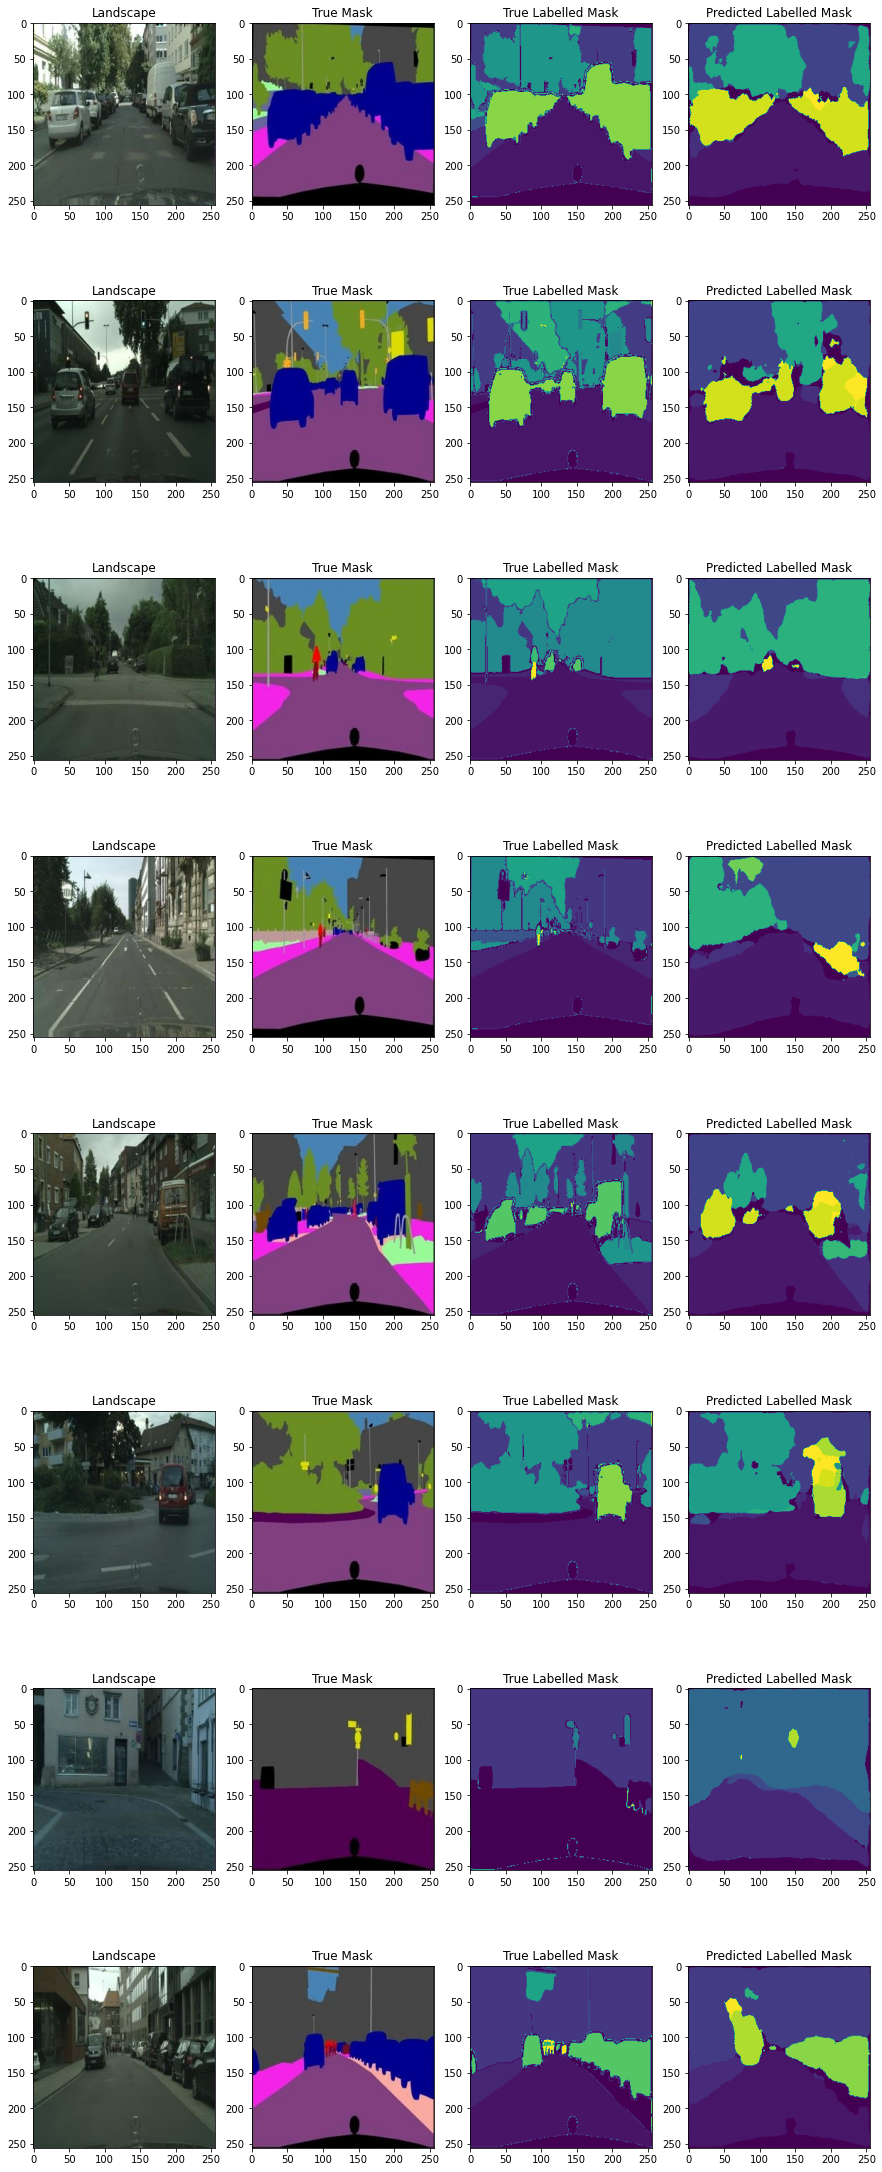

In [51]:
#@title SegFast Model Prediction

test_batch_size = 8
no_of_test_img = len(os.listdir(test_imgs_dir))
random_test_sample = random.sample(range(no_of_test_img), test_batch_size)
print(random_test_sample)  # random_test_sample = [5, 31, 23, 37, 10, 29, 13, 33]

fig, axes =  plt.subplots(test_batch_size, 4, figsize=(3*5, test_batch_size*5))

soft_dice_scores = []
iou_scores = []
iou_scores2 = []

for i in range(test_batch_size):

  ii = random_test_sample[i]
  landscape = cv2.imread(test_imgs_dir + test_img_names[ii])
  landscape = landscape.astype('float32')
  landscape /= 255.0

  test_mask_img = cv2.imread(test_masks_dir + test_mask_names[ii])
  test_label_class = cv2.imread(test_label_masks_dir + test_labelled_mask_names[ii], cv2.IMREAD_UNCHANGED)
  
  Y_pred = segfast_model.predict(landscape[tf.newaxis, ...])
  test_label_class_predicted = create_mask(Y_pred)  # defined function create_mask()  
  
  axes[i,0].imshow(landscape)
  axes[i,0].set_title("Landscape")
  axes[i,1].imshow(test_mask_img)
  axes[i,1].set_title("True Mask")
  axes[i,2].imshow(test_label_class)
  axes[i,2].set_title("True Labelled Mask")
  axes[i,3].imshow(array_to_img(test_label_class_predicted))
  axes[i,3].set_title("Predicted Labelled Mask")

    
  # IOU score
  test_label_class1 = tf.keras.utils.to_categorical(test_label_class, 20)
  test_label_class_predicted1 = tf.keras.utils.to_categorical(test_label_class_predicted, 20)

  intersection = np.logical_and(test_label_class1, test_label_class_predicted1)
  union = np.logical_or(test_label_class1, test_label_class_predicted1)
  iou_score = np.sum(intersection) / np.sum(union)
  iou_scores.append(iou_score)

  # IOU score 2
  iou_score2 = 1 - IoULoss(test_label_class1, test_label_class_predicted1)
  iou_scores2.append(iou_score2)

  # Soft Dice Metric
  soft_dice_score = 1 - soft_dice_loss(test_label_class, test_label_class_predicted1)
  soft_dice_scores.append(soft_dice_score)

print("Mean IOU Score : ", sum(iou_scores) / len(iou_scores))
print("Mean IOU Score2 : ", sum(iou_scores2) / len(iou_scores2))
print("Mean Soft Dice Score: ", sum(soft_dice_scores) / len(soft_dice_scores))